# Exploratory Data Analysis
In order to better understanding of the data we will be looking at throughout that project.

When we getting started an Exploratory Data Analisys (EDA), we should answer the next questions:

1. Look at the number of rows and columns in the dataset. 
2. Check if there are missing values in any of the rows or columns.
3. Check if any columns are of different data types than you would expect(e.g., numbers showing as strings)
4. Check that each column is a variable, and each row is an individual.
5. Build exploratory plots like bar charts, histograms, and scatterplots to better understand the data.

In [33]:
import os
import re
import logging
import string

import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from nltk import word_tokenize

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

%matplotlib inline

# logging configuration.
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
logging.info("Required packages installed.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gomesluiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-12-01 00:22:32,495 - root - INFO - Required packages installed.


In [34]:
# notebook constants.
URL_PATH_FILE="https://raw.githubusercontent.com/gomesluiz/product-review-analytics/main/data/raw/buscape.csv?token=GHSAT0AAAAAAB2WPKBH6RP2KMF2C3TS3V6CY4IE62Q"

In [35]:
def get_data(file):
    """Get the data from csv file
    
    """
    return pd.read_csv(file)

In [36]:
reviews = get_data(URL_PATH_FILE)
reviews.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...","estou muito satisfeito, o visor e melhor do qu...","['estou', 'muito', 'satisfeito', 'visor', 'mel...",1.0,4,1,1
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...","""muito boa\n\no que gostei: preco\n\no que nao...","['muito', 'boa', 'que', 'gostei', 'preco', 'qu...",1.0,5,1,1
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...","rapida, otima qualidade de impressao e facil d...","['rapida', 'otima', 'qualidade', 'de', 'impres...",1.0,5,1,1
3,2_446456,Produto de ótima qualidade em todos os quesito!,produto de otima qualidade em todos os quesito!,"['produto', 'de', 'otima', 'qualidade', 'em', ...",1.0,5,1,1
4,0_11324,Precisava comprar uma tv compatível com meu dv...,precisava comprar uma tv compativel com meu dv...,"['precisava', 'comprar', 'uma', 'tv', 'compati...",1.0,5,1,1


### Question 1.
How many rows and columns the dataset has?

In [37]:
num_rows = reviews.shape[0]
num_cols = reviews.shape[1]
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

The dataset has 84991 rows and 8 columns.


### Question 2.
1. Which columns had missing values?

In [38]:
missing_cols = set(reviews.columns[reviews.isnull().sum() != 0])
print(missing_cols)

{'review_text', 'polarity', 'review_text_processed'}


2. Which columns have more than 20% of missing values?

In [39]:
most_missing_cols = set(reviews.columns[reviews.isnull().mean() > 0.20])
print(most_missing_cols)

set()


### Question 3.
Check if any columns are of different data types than you would expect(e.g., numbers showing as strings)


In [40]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84991 entries, 0 to 84990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_index         84991 non-null  object 
 1   review_text            84990 non-null  object 
 2   review_text_processed  84990 non-null  object 
 3   review_text_tokenized  84991 non-null  object 
 4   polarity               73627 non-null  float64
 5   rating                 84991 non-null  int64  
 6   kfold_polarity         84991 non-null  int64  
 7   kfold_rating           84991 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.2+ MB


<AxesSubplot: >

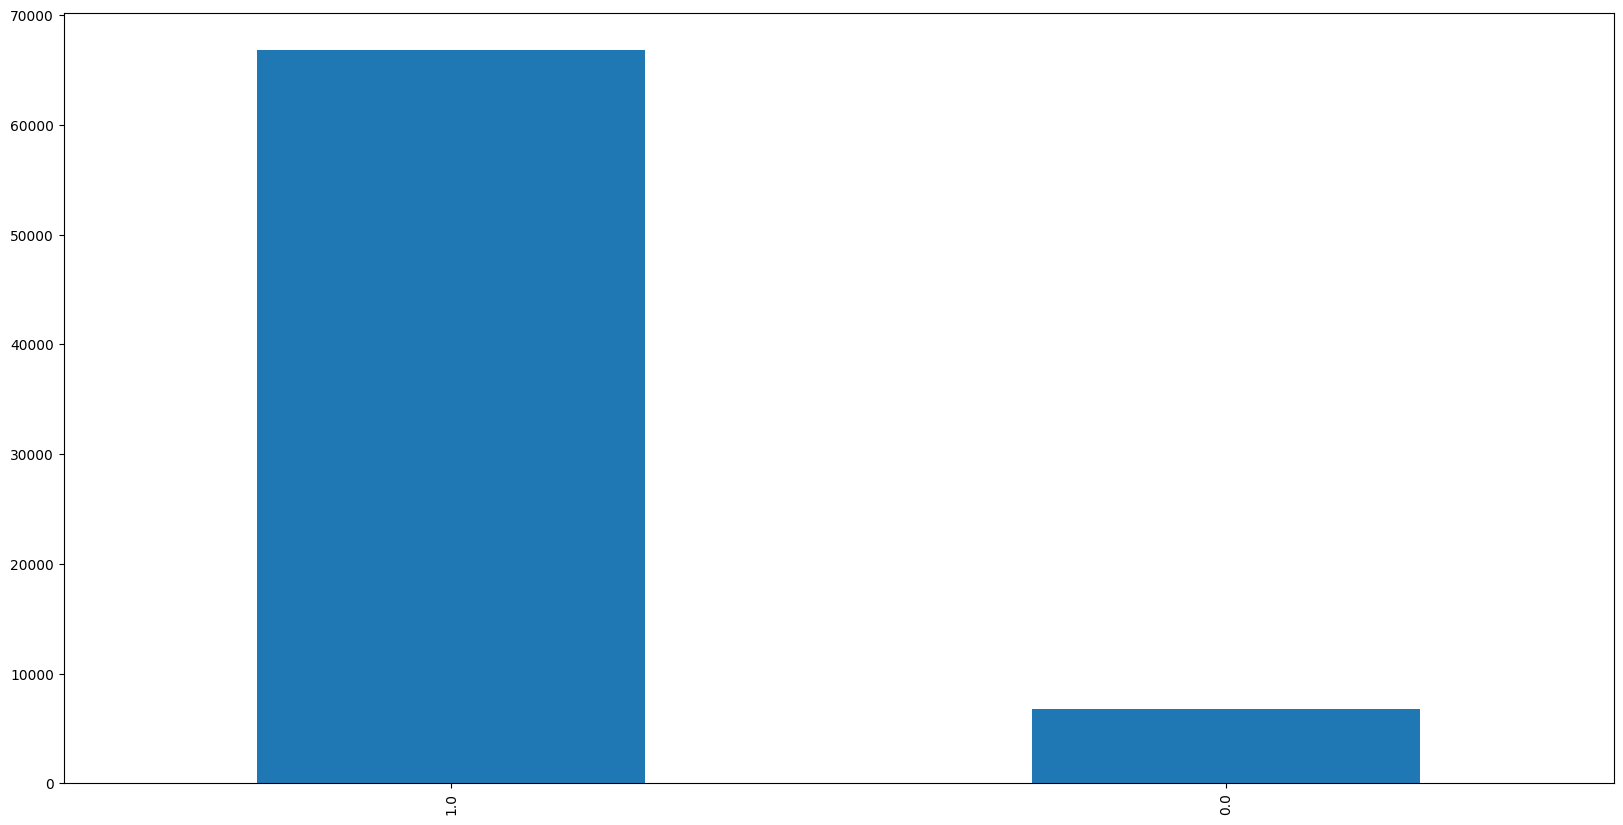

In [41]:
plt.figure(figsize=(20, 10))
polarity_counts = reviews['polarity'].value_counts()
polarity_counts.plot(kind="bar")

### Question 4.
Text statistics on **review_text**.

In [42]:
def word_counter(text):
    """ Word counter.
    """
    return len(text.split())

def clean_text(text):
    """ Make text lowercase, remove text in square brackets, remove punctuation and 
        remove words containing numbers.
    
    Args:
        text(str): string text to be cleaned.

    Returns:
        A cleaned text

    """
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[``""...]', '', text)
    text = re.sub('\n', ' ', text)

    return text

In [43]:
reviews.dropna(subset=['review_text'], inplace=True)
reviews.loc[:, ['review_text_cleaned']] = reviews['review_text'].apply(lambda x: clean_text(x))
reviews.loc[:, ['review_text_cleaned_len']] = reviews['review_text_cleaned'].apply(word_counter)
reviews.loc[:, ['review_text_cleaned_no_stopwords']] = reviews['review_text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
reviews.loc[:, ['review_text_cleaned_len_no_stopwords']] = reviews['review_text_cleaned_no_stopwords'].apply(word_counter)

/tmp/ipykernel_2019/2667142545.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reviews.loc[:, ['review_text_cleaned_len']] = reviews['review_text_cleaned'].apply(word_counter)
/tmp/ipykernel_2019/2667142545.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reviews.loc[:, ['review_text_cleaned_len_no_stopwords']] = reviews['review_text_cleaned_no_stopwords'].apply(word_counter)


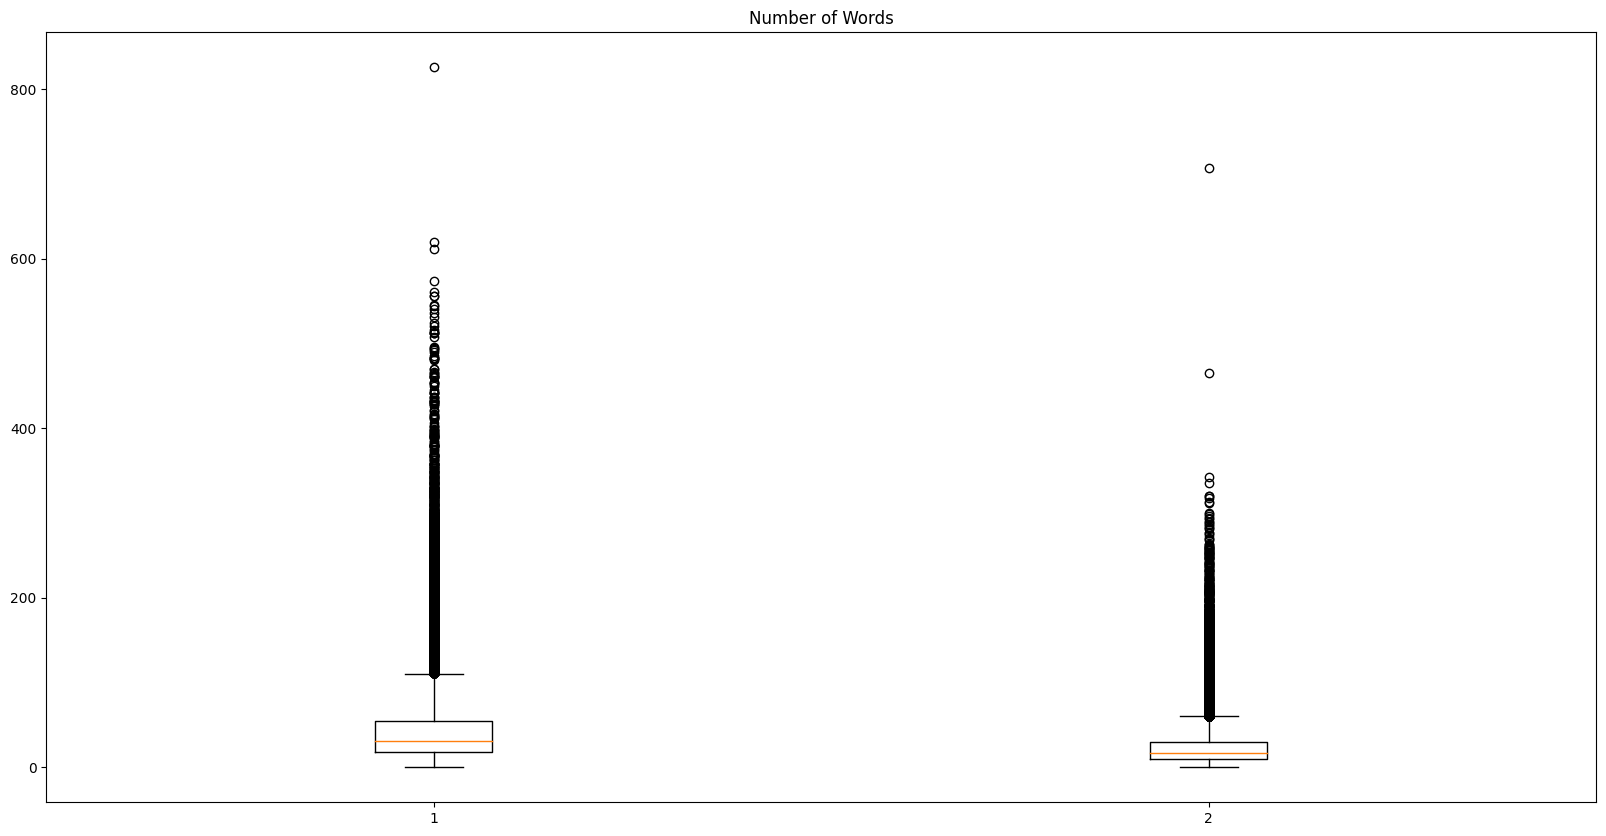

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Number of Words')
_ = ax.boxplot([reviews['review_text_cleaned_len'], reviews['review_text_cleaned_len_no_stopwords']], 
    showfliers=True)

In [45]:
ROOT_PATH = os.path.dirname(os.path.abspath(os.curdir))
DATA_PROCESSED_PATH = os.path.join(ROOT_PATH, "data", "processed")
if not os.path.exists(DATA_PROCESSED_PATH):
    os.mkdirs(DATA_PROCESSED_PATH)
  

reviews[['original_index', 'review_text', 'review_text_cleaned', 'review_text_cleaned_len',
         'review_text_cleaned_no_stopwords', 'review_text_cleaned_len_no_stopwords', 'polarity']].to_csv(f"{DATA_PROCESSED_PATH}/buscape_reviews_full_dataset.csv", index=False)